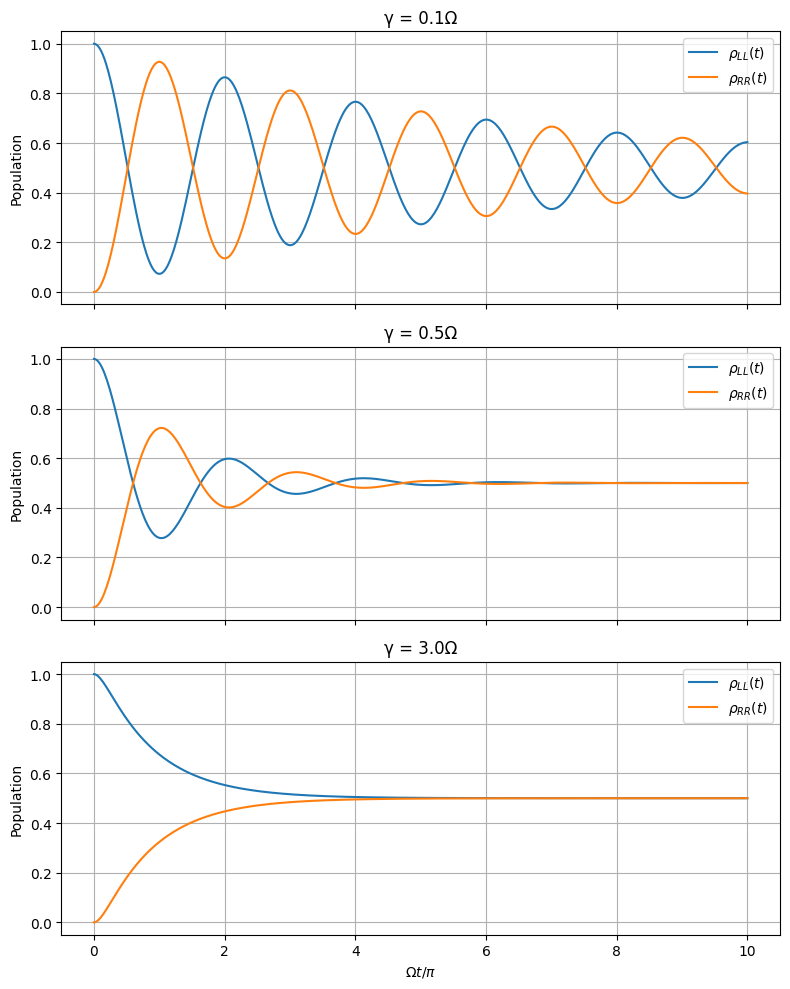

In [39]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


Omega = 1.0
gammas = [0.1 * Omega, 0.5 * Omega, 3 * Omega]
t_vals = np.linspace(0, 10 * np.pi, 500)
rho0 =  np.array([1, 0, 0, 0], dtype=complex) 

def lindblad(t, y, Omega, gamma):
    rho_LL, rho_LR, rho_RL, rho_RR = y

    d_rho_LL = - 1j * Omega/2 * (rho_LR - rho_RL)
    d_rho_RR = - 1j * Omega/2 * (rho_RL - rho_LR)
    d_rho_LR = - 1j * Omega/2 * (rho_LL - rho_RR) - gamma * rho_LR
    d_rho_RL = - 1j * Omega/2 * (rho_RR - rho_LL) - gamma * rho_RL

    return np.array([d_rho_LL, d_rho_LR, d_rho_RL, d_rho_RR], dtype=complex)


fig, axs = plt.subplots(len(gammas), 1, figsize=(8, 10), sharex=True)

for i, gamma in enumerate(gammas):
    sol = solve_ivp(lindblad, [0, 10 * np.pi], rho0, t_eval=t_vals, args=(Omega, gamma))
    t_plot = Omega * sol.t / np.pi
    rho_LL = sol.y[0]
    rho_RR = sol.y[3]

    axs[i].plot(t_plot, rho_LL, label=r'$\rho_{LL}(t)$')
    axs[i].plot(t_plot, rho_RR, label=r'$\rho_{RR}(t)$')
    axs[i].set_title(f'γ = {gamma:.1f}Ω')
    axs[i].set_ylabel('Population')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel(r'$\Omega t/\pi$')
plt.tight_layout()
plt.show()
